In [1]:
# Required packages
# !pip install git+https://github.com/mkrphys/ipython-tikzmagic.git
%load_ext tikzmagic

#pip install jupyterlab_markup
# or
#conda install -c conda-forge jupyterlab-markup

from IPython.display import display, Latex, Markdown

# !conda install sympy
from sympy import Matrix, latex, print_latex, init_printing
init_printing()

# Estimation Theory

or 

# Remote Sensing Data

## Parameter Estimation

The likelihood function of a random variable $x$ is given as 
$$
\begin{align*}
  f_y(y \mid x) = \frac{x}{y^2} \cdot \exp \left( -\frac{x^2}{2y^2} \right)
  &&\text{for}&& x &> 0 &&\text{and}& y &\neq 0
\end{align*}
$$

With that information, we can compute the _maximum-likelihood estimate (MLE)_ $\hat{x}_\text{MLE}$ by letting the gradient of $f_y$ vanish at that point:

$$
\begin{align*}
  \frac{\partial}{\partial x} f_y(y \mid x) \stackrel{!}{=} 0 &= \frac{1}{y^2} \exp \left( -\frac{x^2}{2y^2} \right) + \frac{x}{y^2} \exp \left( -\frac{x^2}{2y^2} \right) \cdot \frac{-2x}{2x^2} \\
  0 &= \left( \frac{1}{y^2} - \frac{2x^2}{2y^2} \right) \cdot \exp \left( -\frac{x^2}{2y^2} \right) \\
  \Leftrightarrow  \quad 
  0 &= \frac{1}{y^2} - \frac{2x^2}{2y^4} \\
  \Leftrightarrow  \quad 
  x^2 &= y^2 \\
  \Rightarrow  \quad 
  \hat{x}_\text{MLE} &= 
  \begin{cases} 
    y & \text{if}\quad y > 0 \\
    -y& \text{else} 
  \end{cases}
\end{align*}
$$

If we have access to further information about the data distribution, e.g.,
$$
\begin{align*}
  f_x(x) &= \frac{x}{x_0^2} \cdot \exp \left( -\frac{x^2}{2x_0^2} \right)\;,
\end{align*}
$$
we can infer the optimal parameter $\hat{x}_\text{MAP} = \operatorname{arg max}_x f_x(x \mid y)$ through _maximun a-priori (MAP)_ estimation through
$$
\begin{align*}
  f_x\left(x \mid y\right) \propto f_y\left(y \mid x\right) \cdot f_x\left(x\right) &=
  \frac{x}{y^2} \cdot \exp \left( -\frac{x^2}{2y^2} \right) \cdot \frac{x}{x_0^2} \cdot \exp \left( -\frac{x^2}{2x_0^2} \right) \\
  &= \frac{x^2}{x_0^2 y^2} \cdot \exp \left( x^2 \left( -\frac{1}{2y^2} - \frac{1}{2x_0^2} \right) \right)
\end{align*}
$$
Again, the derivative of that objective needs to vanish, i.e.,
$$
\begin{align*}
  \frac{\partial}{\partial x} f_x\left(x \mid y\right) \stackrel{!}{=} 0 &=
  \frac{2x}{x_0^2y^2} \cdot \exp \left( x^2 \left( -\frac{1}{2y^2} - \frac{1}{2x_0^2} \right) \right) +
  \frac{x^2}{x_0^2 y^2} \cdot \exp \left( x^2 \left( -\frac{1}{2y^2} - \frac{1}{2x_0^2} \right) \right) 2x \left( -\frac{1}{2y^2} - \frac{1}{2x_0^2} \right) \\
  0 &= \exp \left( x^2 \left( -\frac{1}{2y^2} - \frac{1}{2x_0^2} \right) \right) \cdot
  \left( \frac{2x}{x_0^2 y^2} + \frac{x^2}{x_0^2 y^2} \cdot 2x \left( -\frac{1}{2y^2} - \frac{1}{2x_0^2} \right) \right) \\
  \Leftrightarrow\quad \frac{2x^3}{x_0^2 y^2} \left( -\frac{1}{2y^2} - \frac{1}{2x_0^2} \right) &= -\frac{2x}{x_0^2 y^2} \\
  x^2 \left( -\frac{1}{2y^2} - \frac{1}{2x_0^2} \right) &= -1 \\
  \hat{x}_\text{MAP} &= \sqrt{ \frac{2 x_0^2 y^2}{x_0^2 + y^2} }
\end{align*}
$$

## Optimal Estimation

### Least-Squares Estimation

Let assume we have vectorized measurments $z = K x + \varepsilon$ that is corrupted by iid. white noise $\varepsilon$.
The goal now is to infer an estimate that minimizes the square of the residuals, i.e.
$$
  \hat{x} = \left( K^\top K \right)^{-1} K^\top z \quad .
$$
During an experiment a system parameter $a$ of an object is measured by two independent and unbiased instruments through
$$
\begin{align*}
  z_1 &= a + \varepsilon_1 & \text{and}&& z_2 &= a + \varepsilon_2
\end{align*}
$$
which are corrupted by normal-distrubuted noise $\varepsilon_1$ and $\varepsilon_2$ with variances $\sigma_1^2$ and $\sigma_2^2$, respectively.

To find a least-squares estimate of $a$, we prepare some concatenated data structures, i.e.,
$$
\begin{align*}
  C_{\varepsilon\varepsilon} &= \begin{bmatrix} \sigma_1^2 & 0 \\ 0 & \sigma_2^2 \end{bmatrix} &
  C_{\varepsilon\varepsilon}^{-1} &= \begin{bmatrix} \sigma_1^{-2} & 0 \\ 0 & \sigma_2^{-2} \end{bmatrix} &
  z &= \begin{bmatrix} z_1 \\ z_2 \end{bmatrix} &
  K &= \begin{bmatrix} 1 \\ 1 \end{bmatrix} &
  \varepsilon &= \begin{bmatrix} \varepsilon_1 \\ \varepsilon_2 \end{bmatrix} 
\end{align*}
$$

Then, we can plug everything together to obtain our objective
$$
\begin{align*}
  \hat{a} &= \left( K^\top C_{\varepsilon\varepsilon}^{-1} K \right)^{-1} K^\top C_{\varepsilon\varepsilon}^{-1} \\
  &= \left( \sigma_1^{-2} + \sigma_2^{-2} \right)^{-1} \cdot \left( \sigma_1^{-2} z_1 + \sigma_2^{-2} z_2 \right) \\
  &= \frac{\sigma_2^2}{\sigma_1^2 + \sigma_2^2} z_1 + \frac{\sigma_1^2}{\sigma_1^2 + \sigma_2^2} z_2
\end{align*}
$$

As we assume the noise component $\varepsilon$ to be iid., the variances are all equal and the objective simplifies to
$$
  \hat{a} = \frac{z_1 + z_2}{2}
$$

### Foo

The vectorized velocity $\dot{d} = (dx, dy)$ of a moving target $T$ is measured by a radar sensor. However, the system can only measure the velocity $(\dot{r_1}, \dot{r_2})$ projected to viewing direction $\phi$ of the sensor.

For different measurements, the viewing directions $\phi_i, i \in \{ 1,2,3 \},$ are known and should be considered as a part of the model. 
The task is to estimate the velocity $\widehat{d} = \left( \widehat{dx}, \widehat{dy} \right)$ of the moving target by minimizing the sum of squared residuals.

First, we can obtain the elements of the matrix $K$ to estimate the velocity vector $\widehat{d} = \left( \widehat{dx}, \widehat{dy} \right)$ under the assumption of having only white noise corrupted the measurement:

$$
\begin{align*}
  r &= \begin{bmatrix} r_1 \\ r_2 \end{bmatrix} &
  K &= \begin{bmatrix} \sin \phi_1 & -\cos \phi_1 \\ \sin \phi_2 & -\cos \phi_2 \end{bmatrix} &
  d &= \begin{bmatrix} dx \\ dy \end{bmatrix}
\end{align*}
$$

With that, we can compute the estimate via
$$
\begin{align*}
  \widehat{d} &= \left( K^\top K \right)^{-1} K^\top r
\end{align*}
$$

## Kalman Filter

An object is moving with the constant acceleration $\dot{a}$. 
At every time step $t-1$, the state
$$
  x_{t-1} = \begin{bmatrix} p_{t-1} \\ v_{t-1} \\ \dot{a} \end{bmatrix}
$$
of that object is given by its position $p_{t-1}$ and velocity $v_{t-1}$.

The transition from state $x_{t-1}$ to $x_t$ can be modeled by the _state transition function_
$$
  x_t = M_t x_{t-1} + w_t
$$
with noise component $w_t$.

Given the previous information, we can derive an explicit physical formulation of the that model.
With every time step, the position and velocity of the object will be updated, i.e.,
$$
\begin{align*}
  p_t &= p_{t-1} + v_{t-1} \cdot \Delta t + \frac{\dot{a} \Delta \cdot t^2}{2} \\
  v_t &= v_{t-1} + \dot{a} \cdot \Delta t
\end{align*}
$$
Thus, the linear state transition function can be formulated as
$$
  M_T = 
  \begin{bmatrix}
    1 & \Delta t & \frac{\Delta t^2}{2} \\
    0 & 1 & \Delta t \\
    0 & 0 & 1
  \end{bmatrix}
$$

### Practical Demo

Suppose we measure the position of a car after every 0.1 seconds. 
However, our measurements are corrupted by white Gaussian noise with zero mean and standard deviation $\sigma_\varepsilon = 1$.
Assuming that the car at time $t = 0$ was initially at position 0 with velocity that
equals to 25% of the real constant velocity of $5\, \mathrm{m}/\mathrm{s}$.

We can use a Kalman filter predict and estimate the state $x_t$ (position/velocity) of the car after $t = 5\, \mathrm{s}$. 
Here we assume that the constant velocity model is perfect (i.e., no process noise) and initial prior covariance matrix $C_{\hat{x}\hat{x}} = C_{\varepsilon\varepsilon}$.

Again, we prepare the state vectors and transition matrices:
$$
\begin{align*}
  M_t &= \begin{bmatrix} 1 & 0.1 \\ 0 & 1 \end{bmatrix}
  &
  \hat{x}_t &= \begin{bmatrix} 0 \\ 1.25 \end{bmatrix}
  &
  C_{\hat{x}\hat{x}} &= \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}
  &
  C_{ww} &= \begin{bmatrix} 0 & 0 \\ 0 & 0 \end{bmatrix}
  &
  K &= \begin{bmatrix} 1 \\ 0 \end{bmatrix}
  &
  C_{\varepsilon\varepsilon} &= \begin{bmatrix} 1 \end{bmatrix}
\end{align*}
$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class KalmanFilter(object):
    def __init__(self, F = None, B = None, H = None, Q = None, R = None, P = None, x0 = None):

        if(F is None or H is None):
            raise ValueError("Set proper system dynamics.")

        self.n = F.shape[1]
        self.m = H.shape[1]

        self.F = F
        self.H = H
        self.B = 0 if B is None else B
        self.Q = np.eye(self.n) if Q is None else Q
        self.R = np.eye(self.n) if R is None else R
        self.P = np.eye(self.n) if P is None else P
        self.x = np.zeros((self.n, 1)) if x0 is None else x0

    def predict(self, u = 0):
        self.x = np.dot(self.F, self.x) + np.dot(self.B, u)
        self.P = np.dot(np.dot(self.F, self.P), self.F.T) + self.Q
        return self.x

    def update(self, z):
        y = z - np.dot(self.H, self.x)
        S = self.R + np.dot(self.H, np.dot(self.P, self.H.T))
        K = np.dot(np.dot(self.P, self.H.T), np.linalg.inv(S))
        self.x = self.x + np.dot(K, y)
        I = np.eye(self.n)
        self.P = np.dot(np.dot(I - np.dot(K, self.H), self.P), 
                        (I - np.dot(K, self.H)).T) + np.dot(np.dot(K, self.R), K.T)

In [4]:
dt = .1
F = np.array([[1, dt, 0], 
              [0, 1, dt], 
              [0, 0, 1]])
H = np.array([1, 0, 0]).reshape(1, 3)
Q = np.array([[0.05, 0.05, 0.0], 
              [0.05, 0.05, 0.0], 
              [0.0, 0.0, 0.0]])
R = np.array([0.5]).reshape(1, 1)

T = np.arange(dt, 5, dt)

# our initial guess is 0 for position and acceleration and 1.25 m/s for velocitoy, 
# will be corrected later through Kalman filtering
x0 = np.array([0, .25*5, 0])

display(Markdown('Again, we prepare the state vectors and transition matrices:'),
        Latex(f'\\begin{{align*}} ' 
              f'  M   &= {latex(Matrix(F))} & H   &= {latex(Matrix(H))} \\\\'
              f'  Q   &= {latex(Matrix(Q))} & R   &= {latex(Matrix(R))} \\\\'
              f'  x_0 &= {latex(Matrix(x0))} \\\\'
              f'\\end{{align*}}'))

Again, we prepare the state vectors and transition matrices:

<IPython.core.display.Latex object>

<Figure size 640x480 with 0 Axes>

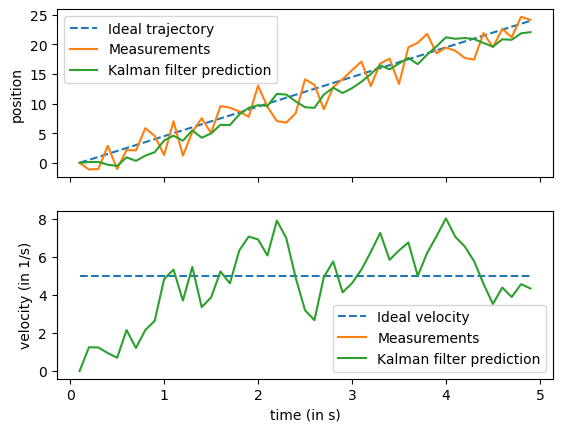

In [5]:
# define some arrays for later plitting

# that's the ideal trajectoy
ideal = [np.array([0, 5, 0])]
#                  |  |  |
#                  |  |  +-> acceleration
#                  |  +----> velocity
#                  +-------> position

measurements = [np.zeros_like(H @ ideal[-1])]
predictions = [np.zeros_like(ideal[-1])]

# get the 'real' states
for t in T[1:]:
    # propagate the ideal states
    ideal.append(F @ ideal[-1])
    
    # we only see through the sensor's goggles, i.e., limited number of states and sensor noise
    measurements.append(H @ ideal[-1] + np.random.normal(0, 2))
    
# initialize the Kalman filter
kf = KalmanFilter(F = F, H = H, Q = Q, R = R, x0 = x0)

for t, x, z in zip(T[1:], ideal, measurements):
    # predict the next state
    x_ = kf.predict()
    
    # we can only see through the sensor's goggles
    z_ = np.dot(H, x_)
    
    # save the prediction for later plotting
    # predictions.append(z_)
    predictions.append(x_)
    
    # correct the prediction with the measurement and update Kalman filter
    kf.update(z)

import matplotlib.pyplot as plt

plt.clf()
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(T, ideal @ H.transpose(), '--', label = 'Ideal trajectory')
ax[0].plot(T, measurements, label = 'Measurements')
ax[0].plot(T, predictions @ H.transpose(), label = 'Kalman filter prediction')
ax[0].legend()
ax[0].set_ylabel('position')

H_ = np.array([0, 1, 0])
ax[1].plot(T, np.matrix(ideal)[:,1], '--', label = 'Ideal velocity')
ax[1].plot(T, T*np.nan, label = 'Measurements') # we don't have measurements, but for color consistency
ax[1].plot(T, predictions @ H_, label = 'Kalman filter prediction')
ax[1].legend()
ax[1].set_xlabel('time (in s)')
ax[1].set_ylabel('velocity (in 1/s)');